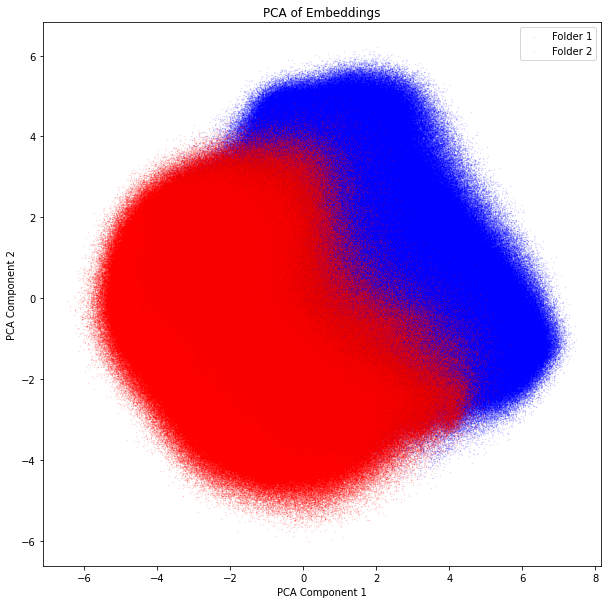

In [15]:
import os
import h5py
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd 

def load_embeddings_from_folder(folder_path):
    """
    Load all embeddings from h5 files in the specified folder.
    """
    embeddings = []
    for idx, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith(".h5"):
            file_path = os.path.join(folder_path, filename)
            with h5py.File(file_path, 'r') as file:
                embeddings.append(np.array(file['features']))
    return np.vstack(embeddings)

def load_embeddings_and_labels(folder_path, df):
    """
    Load embeddings from h5 files in the specified folder and their corresponding labels.
    """
    embeddings = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".h5"):
            file_path = os.path.join(folder_path, filename)
            slide_id = filename.replace('.h5', '')
            label = df[df['slide_id'] == slide_id]['brca_status'].iloc[0]
            with h5py.File(file_path, 'r') as file:
                embeddings.append(np.array(file['features']))
                labels.append(label)
    return np.vstack(embeddings), labels


def perform_pca(embeddings1, embeddings2):
    """
    Perform PCA on two sets of embeddings and return the transformed data.
    """
    pca = PCA(n_components=2)
    all_embeddings = np.vstack([embeddings1, embeddings2])
    transformed_data = pca.fit_transform(all_embeddings)
    return transformed_data

def plot_pca_results(transformed_data, num_points_folder1):
    """
    Plot the PCA results with different colors for points from different folders.
    """
    plt.figure(figsize=(10, 10))
    plt.scatter(transformed_data[:num_points_folder1, 0], transformed_data[:num_points_folder1, 1], color='blue', label='Folder 1',s=0.1,alpha=0.2)
    plt.scatter(transformed_data[num_points_folder1:, 0], transformed_data[num_points_folder1:, 1], color='red', label='Folder 2',s=0.1,alpha=0.2)
    plt.title('PCA of Embeddings')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()


def perform_pca_and_color_by_label(embeddings, labels):
    """
    Perform PCA on embeddings and plot the results colored by labels.
    """
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(embeddings)

    # Plotting
    plt.figure(figsize=(10, 10))
    for label in set(labels):
        indices = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], label=label,s=0.1,alpha=0.01)
    plt.title('PCA of Embeddings Colored by BRCA Status')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()


folder1_path = '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/CLAM/level_0/Ov_ViT_stain_norm/h5_files/'
# df = pd.read_csv('/mnt/ncshare/ozkilim/BRCA/data/tasks/BRCA_pos_neg_FFPE.csv')
# embeddings, labels = load_embeddings_and_labels(folder1_path, df)
# perform_pca_and_color_by_label(embeddings, labels)

# # Example usage:
folder2_path = '/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/CLAM/level_0/Ov_ViT_stain_norm/h5_files/'
embeddings1 = load_embeddings_from_folder(folder1_path)
embeddings2 = load_embeddings_from_folder(folder2_path)
transformed_data = perform_pca(embeddings1, embeddings2)
plot_pca_results(transformed_data, len(embeddings1))

TCGA-25-2401-01Z-00-DX1.AEA99982-DB6B-4178-BEDC-6E1F605B8D7C
TCGA-23-2649-01Z-00-DX1.C94C3B32-D5F5-4A85-9F35-50B377FF9E75
TCGA-23-2078-01Z-00-DX1.E31A9C1E-00EF-4B0D-A15D-6A5C2D00E986
TCGA-23-2072-01Z-00-DX1.478243FF-BFF0-48A4-ADEA-DE789331A50E
TCGA-23-1809-01Z-00-DX1.A8767DEC-EB1A-4EDC-906E-C0560A30455F
TCGA-25-1319-01Z-00-DX1.71EFB946-ACAF-4BA6-8855-D336268D87F0
TCGA-57-1992-01Z-00-DX1.1022B1ED-3DC1-4F71-8635-0F8B28138B8C
TCGA-25-2392-01Z-00-DX1.C37932E5-973F-444D-8CEB-1BED4279165E
TCGA-25-2042-01Z-00-DX1.79198B62-0E0B-46C4-8D35-FE20582B8035
TCGA-42-2590-01Z-00-DX1.83ff5df9-0f36-4884-a93e-f2928ff3c719
TCGA-23-2081-01Z-00-DX1.4105A382-4C2B-4C62-AC93-CB21CC360254
TCGA-25-1316-01Z-00-DX1.A9B7F47C-5BDC-4B7D-BC9F-C4C9DBA663C8
TCGA-25-2391-01Z-00-DX1.3930615C-785B-48D4-BD69-FD87932A518A
TCGA-VG-A8LO-01A-02-DX2.9B58474C-DAC0-4D45-B13C-0A1EA9E1BC32
TCGA-25-1322-01Z-00-DX1.20DA1932-908F-44E5-B2F2-43E41E06165B
TCGA-5X-AA5U-01Z-00-DX1.1A03C105-4086-4AAB-B821-A9E8156FA704
TCGA-OY-A56Q-01Z-00-DX1.

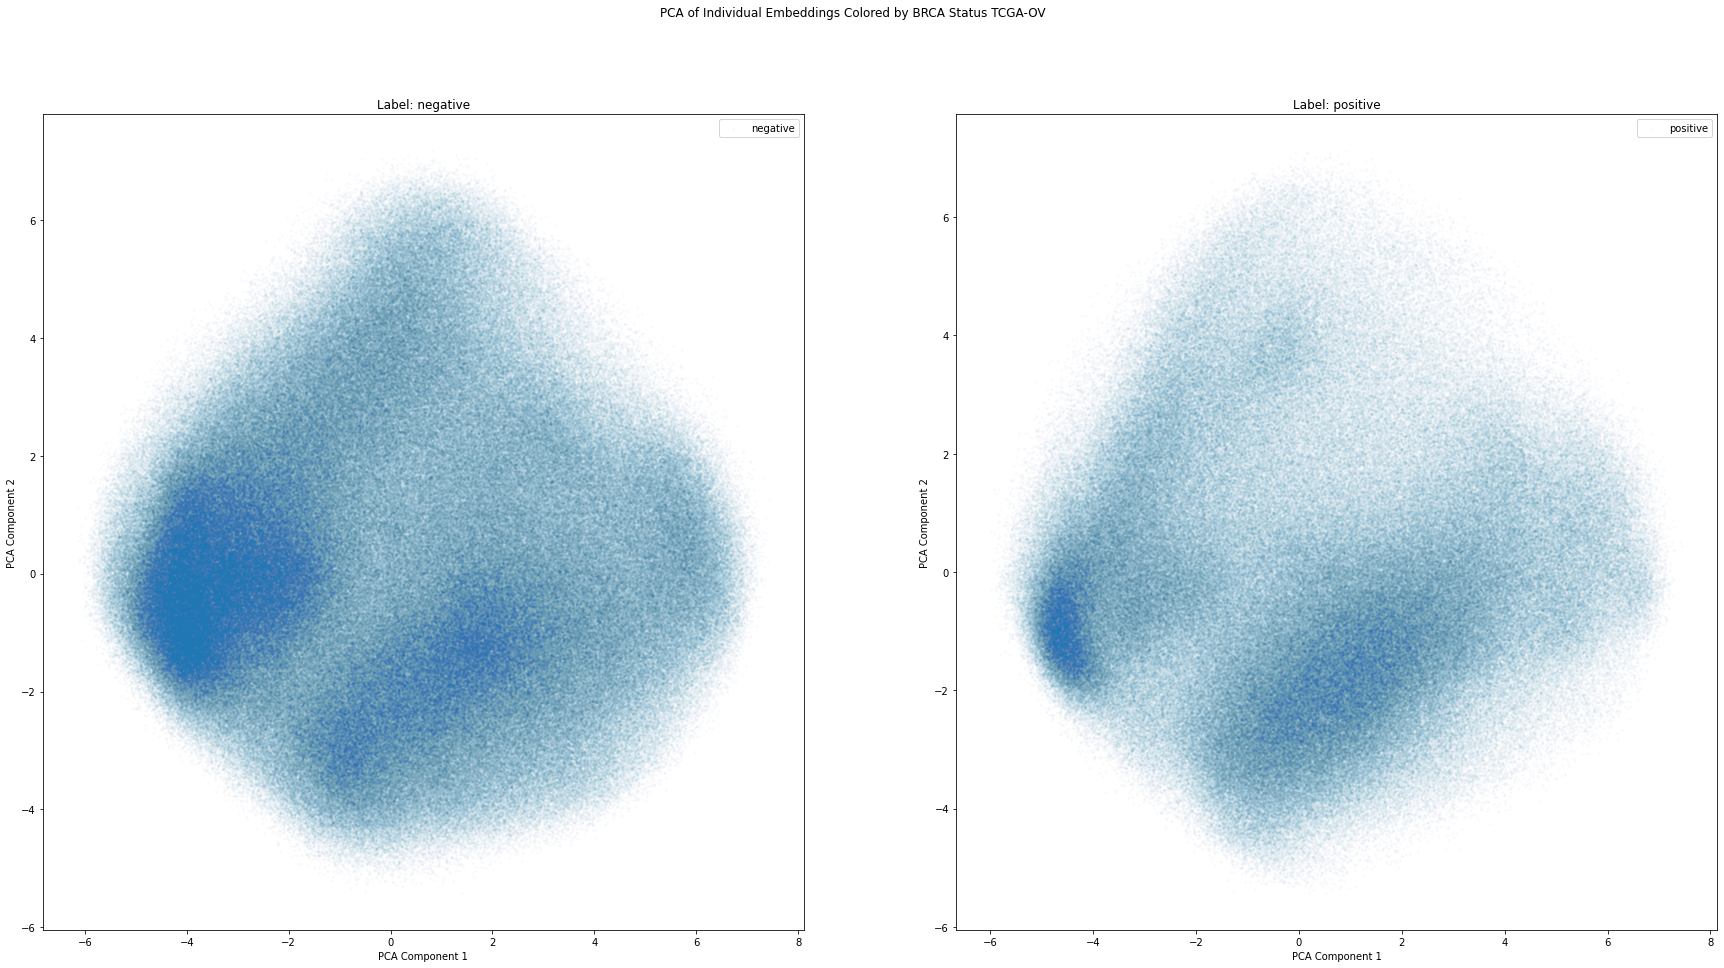

In [3]:
import os
import h5py
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def load_embeddings_and_labels_for_each_embedding(folder_path, df):
    """
    Load each embedding from h5 files in the specified folder and their corresponding labels.
    """
    embeddings = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".h5"):
            file_path = os.path.join(folder_path, filename)
            slide_id = filename.replace('.h5', '')
            print(slide_id)
            label = df[df['slide_id'] == slide_id]['brca_status'].iloc[0]
            with h5py.File(file_path, 'r') as file:
                # Assuming 'features' key contains the embeddings
                file_embeddings = np.array(file['features'])
                embeddings.append(file_embeddings)
                labels.extend([label] * len(file_embeddings))
    return np.vstack(embeddings), labels


def perform_pca_and_color_each_embedding(embeddings, labels):
    """
    Perform PCA on embeddings and plot the results in separate subplots for each label.
    """
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(embeddings)
    # Unique labels
    unique_labels = set(labels)
    # Creating subplots
    n_labels = len(unique_labels)
    fig, axes = plt.subplots(1, n_labels, figsize=(15 * n_labels, 15))

    # Plot each label in a separate subplot
    for ax, label in zip(axes, unique_labels):
        indices = [i for i, l in enumerate(labels) if l == label]
        ax.scatter(transformed_data[indices, 0], transformed_data[indices, 1], label=label, s=3, alpha=0.02)
        ax.set_title(f'Label: {label}')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.legend()

    plt.suptitle('PCA of Individual Embeddings Colored by BRCA Status TCGA-OV')
    plt.show()

# Example usage:
folder_path = '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/CLAM/level_0/Ov_ViT_stain_norm/h5_files/'
df = pd.read_csv('/mnt/ncshare/ozkilim/BRCA/data/tasks/BRCA_pos_neg_FFPE.csv')
embeddings, labels = load_embeddings_and_labels_for_each_embedding(folder_path, df)
perform_pca_and_color_each_embedding(embeddings, labels)

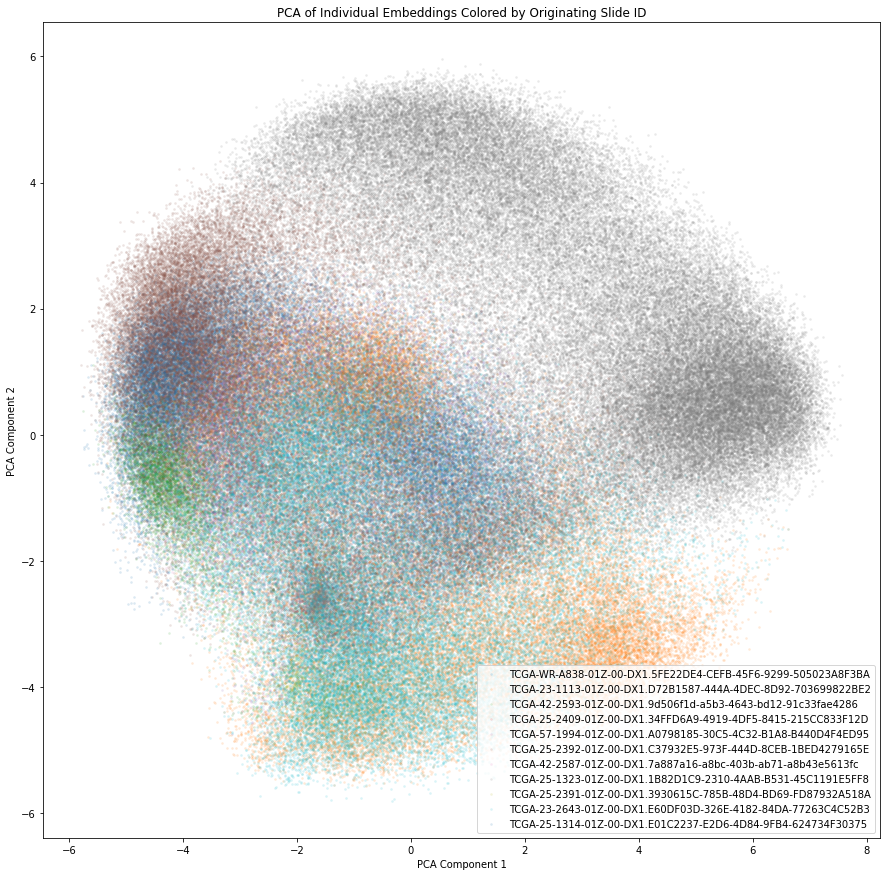

In [10]:
import os
import h5py
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def load_embeddings_and_labels_for_each_embedding(folder_path, df):
    """
    Load each embedding from h5 files in the specified folder and their corresponding slide IDs as labels.
    """
    embeddings = []
    labels = []
    idx = 0
    for filename in os.listdir(folder_path):
        
        if filename.endswith(".h5"):
            file_path = os.path.join(folder_path, filename)
            slide_id = filename.replace('.h5', '')
            with h5py.File(file_path, 'r') as file:
                file_embeddings = np.array(file['features'])
                embeddings.append(file_embeddings)
                labels.extend([slide_id] * len(file_embeddings))  # Use slide_id as label
        idx = idx + 1
    
        # if idx > 10:
        #     break
        
    return np.vstack(embeddings), labels

def perform_pca_and_color_each_embedding(embeddings, labels):
    """
    Perform PCA on embeddings and plot the results colored by the originating slide ID.
    """
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(embeddings)

    # Unique labels (slide IDs)
    unique_labels = set(labels)

    # Plotting
    plt.figure(figsize=(15, 15))
    for label in unique_labels:
        indices = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], label=label, s=3, alpha=0.1)  # Adjust alpha if needed
    plt.title('PCA of Individual Embeddings Colored by Originating Slide ID')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()


folder_path = '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/CLAM/level_0/Ov_ViT_stain_norm_Mancheko/h5_files/'
df = pd.read_csv('/mnt/ncshare/ozkilim/BRCA/data/tasks/BRCA_pos_neg_FFPE.csv')
embeddings, labels = load_embeddings_and_labels_for_each_embedding(folder_path, df)
perform_pca_and_color_each_embedding(embeddings, labels)